In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from skimage.metrics import peak_signal_noise_ratio as compare_psnr

In [2]:
target = 'gaussian'

In [3]:
results = []
for trial in os.listdir('.'):
    if trial.split('_')[0] == target:
        results.append(trial)
        
results.sort()

def load_trained(path):
    noise = np.load(os.path.join(path, 'noise.npy'))
    noisy = np.load(os.path.join(path, 'noisy.npy'))
    original = np.load(os.path.join(path, 'original.npy'))
    residual_curve = np.load(os.path.join(path, 'residual_curve.npy'))
    
    return noise, noisy, original, residual_curve

In [7]:
test_path = results[7]


['recovered_10.npy',
 'noise.npy',
 'base_original.npy',
 'residual_curve.npy',
 '0000023_noisy.jpg',
 'base_10.npy',
 'base_30.npy',
 'recovered_50.npy',
 'recovered_40.npy',
 'base_20.npy',
 '0000045_noisy.jpg',
 '0000021_noisy.jpg',
 '0000035_noisy.jpg',
 'base_50.npy',
 'recovered_30.npy',
 'original.npy',
 'recovered_20.npy',
 'base_40.npy',
 'base_noisy.npy',
 'noisy.npy']

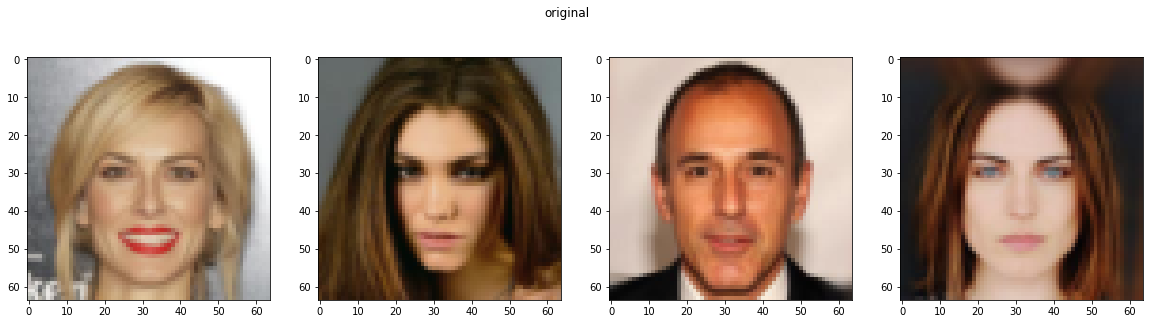

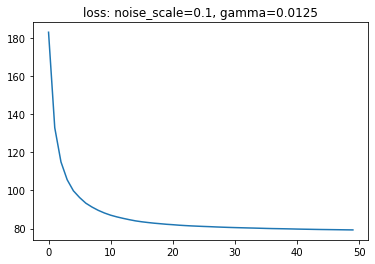

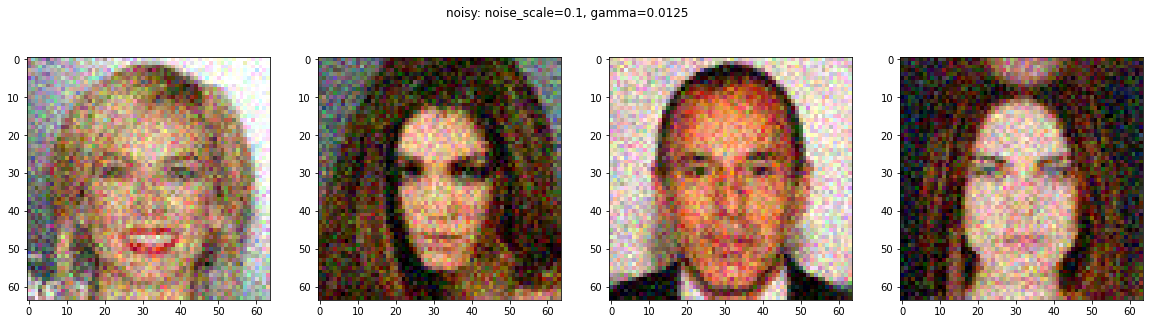

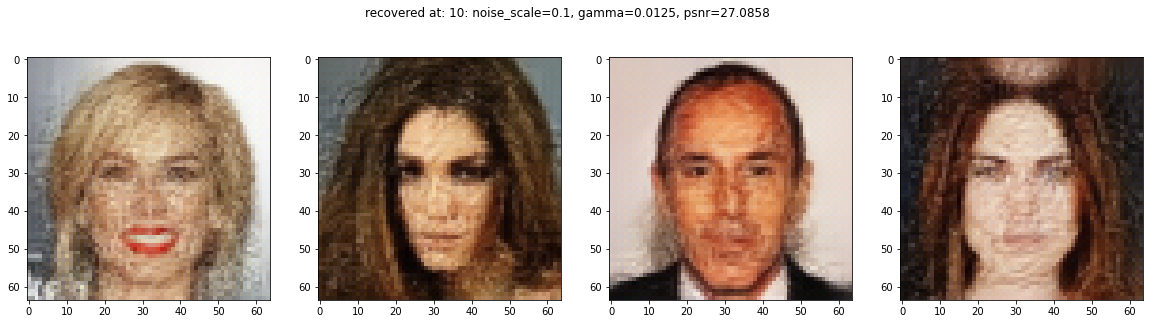

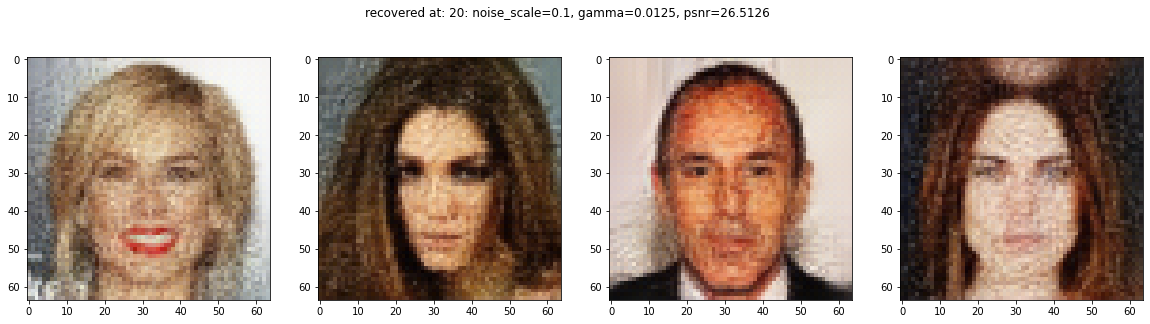

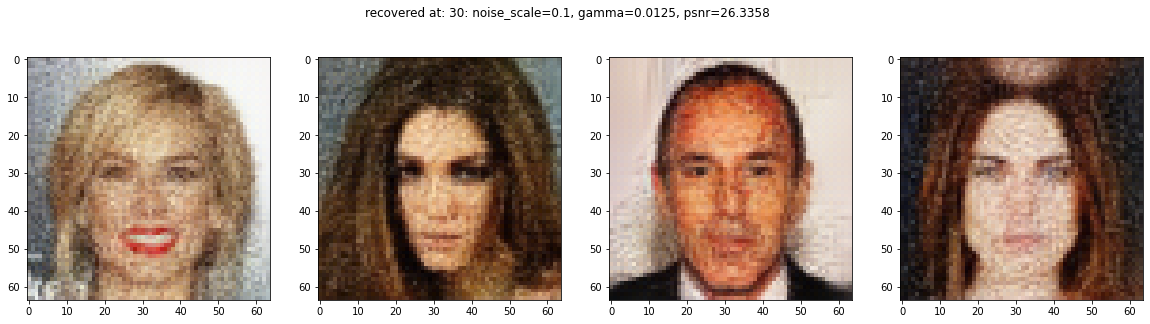

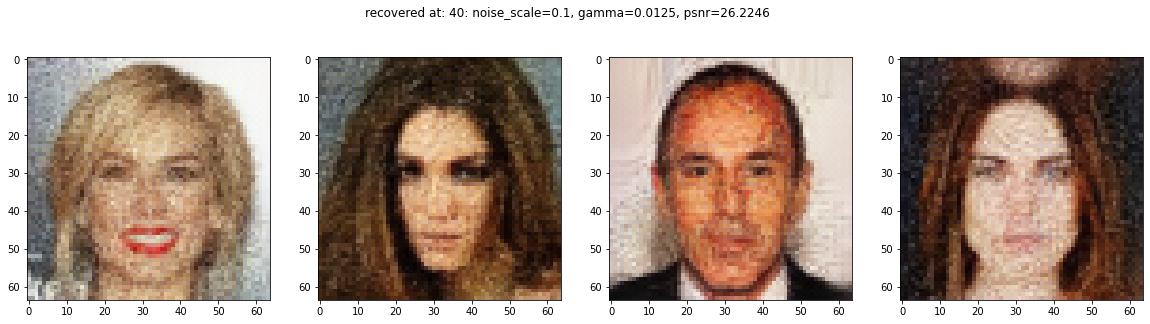

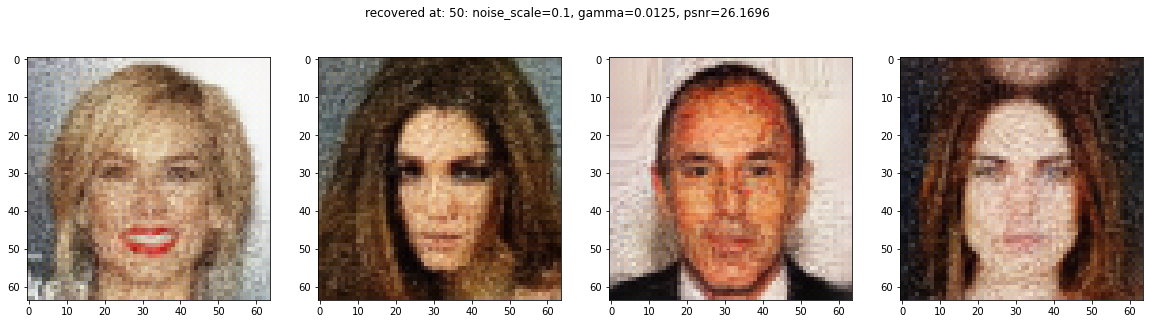

In [8]:
original_showed = False
for trial in results:
    recovered_cps = [str(x) for x in Path(trial).glob("**/recovered_*.npy")]
    base_cps = [str(x) for x in Path(trial).glob("**/base_*.npy")]
    gamma = trial.split('_')[5]
    if len(recovered_cps) > 0 and len(base_cps) > 0:
        noise_info = trial.split('_')[1]
        noise_loc, noise_scale = noise_info.split('#')
        noise, noisy, original, residual_curve = load_trained(trial)
        
        if not original_showed:
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
            for ori, ax in zip(original, axes):
                ax.imshow(ori.transpose(0, 1, 2))
            _ = plt.suptitle(f'original')
            _ = plt.show()
            original_showed = True

        _ = plt.plot(residual_curve)
        _ = plt.title(f'loss: noise_scale={noise_scale}, gamma={gamma}')
        _ = plt.show()

        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
        for noisy, ax in zip(noisy, axes):
            ax.imshow(noisy.transpose(0, 1, 2))
        _ = plt.suptitle(f'noisy: noise_scale={noise_scale}, gamma={gamma}')
        _ = plt.show()
    
        recovered_cps.sort()
        for recovered in recovered_cps:
            checkpoints = recovered.split('_')[-1].replace('.npy', '')
            recovered = np.load(recovered)
            
            psnr = [compare_psnr(x, y) for x,y in zip(original, recovered)]
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
            for recover, ax in zip(recovered, axes):
                ax.imshow(recover.transpose(0, 1, 2))
            _ = plt.suptitle(f'recovered at: {checkpoints}: noise_scale={noise_scale}, gamma={gamma}, psnr={np.mean(psnr):.4f}')
            _ = plt.show()
        
        break
#         base_cps.sort()
#         for base in base_cps:
#             if base not in ['base_noisy.npy', 'base_original.npy']

In [9]:
trial

'gaussian_0#0.1_None_None_random_0.0125_06-24-2021 12:12'

In [13]:
base_cps.sort()
base_cps

['gaussian_0#0.1_None_None_random_0.0125_06-24-2021 12:12/base_10.npy',
 'gaussian_0#0.1_None_None_random_0.0125_06-24-2021 12:12/base_20.npy',
 'gaussian_0#0.1_None_None_random_0.0125_06-24-2021 12:12/base_30.npy',
 'gaussian_0#0.1_None_None_random_0.0125_06-24-2021 12:12/base_40.npy',
 'gaussian_0#0.1_None_None_random_0.0125_06-24-2021 12:12/base_50.npy',
 'gaussian_0#0.1_None_None_random_0.0125_06-24-2021 12:12/base_noisy.npy',
 'gaussian_0#0.1_None_None_random_0.0125_06-24-2021 12:12/base_original.npy']

In [14]:
original_base = np.load(base_cps[-1])
noisy_base = np.load(base_cps[-2])

In [16]:
(noisy_base ** 2).reshape(len(noisy_base), -1).sum(1)

array([51668.73 , 50018.305, 51760.434, 51390.55 ], dtype=float32)

In [17]:
(original_base ** 2).reshape(len(original_base), -1).sum(1)

array([15089.366 , 15165.2   , 15317.3125, 15498.023 ], dtype=float32)